# Introducing the data

In [176]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import chardet

with open(r"C:\Users\rob_e\Code_Projects\Data_Portfolio\Kaggle\Kaggle_Datasets\Superstore_Data-V_Chowdury\Data\Sample-Superstore.csv", 'rb') as rawdata:
    encoding_guess = chardet.detect(rawdata.read(10000))
print(encoding_guess)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


Now that we have a good idea what encoding the data is in let's try to read it.

In [177]:
superstore_data = pd.read_csv(r"C:\Users\rob_e\Code_Projects\Data_Portfolio\Kaggle\Kaggle_Datasets\Superstore_Data-V_Chowdury\Data\Sample-Superstore.csv", encoding = 'ISO-8859-1')

---

# Data Exploration

Let's check out the first few rows of the data and look at what datatypes we have.

In [178]:
superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


We can see that each record contains information about an order that has been placed with the superstore. The fields are a mix of categorical, numerical, and geographical data.

A summary of the data set is provided below.

In [179]:
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

---

# Data Cleaning

First, let's check for missing values and duplicate records in the datset.

In [180]:
superstore_data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Fortunately there are no missing values in the dataset. How about duplicate records?

In [181]:
superstore_data.duplicated().sum()

0

There are also no duplicated rows. Must be our lucky day! 

Let's recheck the field datatypes and see if they make sense given the title, and are the correct type for our analysis.

In [182]:
print(superstore_data.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


It looks like the entries in the Order Date and Ship Date columns are strings. Let's convert them to datetime format to make them easier to work with.

In [183]:
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'], format= "%m/%d/%Y")
superstore_data['Ship Date'] = pd.to_datetime(superstore_data['Ship Date'], format= "%m/%d/%Y")

The data type of the parsed Order Date and Ship Date columns are now:

In [184]:
print(f"Order Date: {superstore_data['Order Date'].dtype} \nShip Date: {superstore_data['Ship Date'].dtype}")

Order Date: datetime64[ns] 
Ship Date: datetime64[ns]


---

# Exploratory Analysis

### Total Sales and Profits

A good place to start the analysis would be to look at how much money the store has made.

In [185]:
# total sales
total_sales = superstore_data['Sales'].sum()
total_profit = superstore_data['Profit'].sum()
print(f"The total sales for the superstore are: ${total_sales:,.2f} \nThe total profit is: ${total_profit:,.2f}")

The total sales for the superstore are: $2,297,200.86 
The total profit is: $286,397.02


---

### Best Selling Category

Digging a little deeper into those figures, let's see what sort of items are being sold and which of those items are making the most money.

In [186]:
print(superstore_data['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


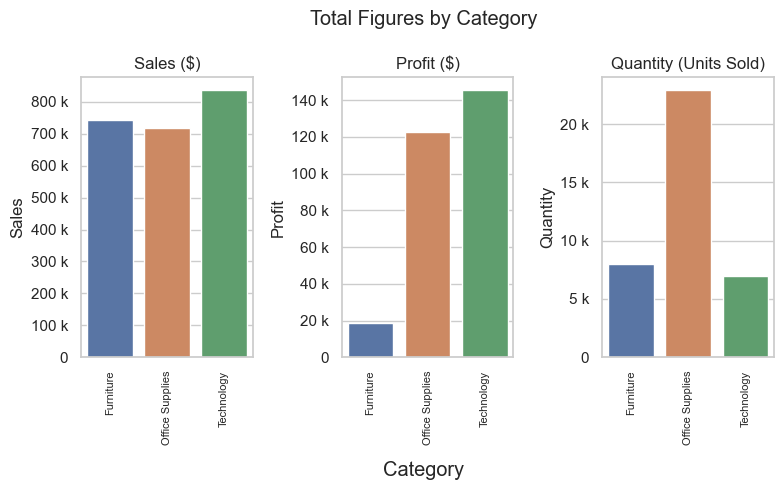

In [187]:
category_analysis = pd.DataFrame(superstore_data.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())

sns.set_theme(style = 'whitegrid')

# Set grouped plots - figure with a 1x3 grid of Axes
figure, axis = plt.subplots(1, 3, figsize=(8, 5))

# Plot barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0])
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1])
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2])

# Set titles
cat1.set(title = 'Sales ($)')
cat2.set(title = 'Profit ($)')
cat3.set(title = 'Quantity (Units Sold)')

# Set spacing between subplots
for barplot in [cat1, cat2, cat3]:
    plt.setp(barplot.get_xticklabels(), rotation = 'vertical', size = 8)
    barplot.yaxis.set_major_formatter(ticker.EngFormatter())
    barplot.set(xlabel = None)
figure.suptitle('Total Figures by Category', x= 0.54)
figure.supxlabel('Category', x= 0.54, y =0.04)
figure.tight_layout()

plt.show()

Looking at the plots we see:
- All three categories of products bring in similar revenue.
- Technology is bringing in both the most revenue and profit, despite selling the lowest volume. 
- Furniture is not proving to be very profitable, perhaps changing supplier or distributor can make the margins better.

---

### Best Selling Subcategory

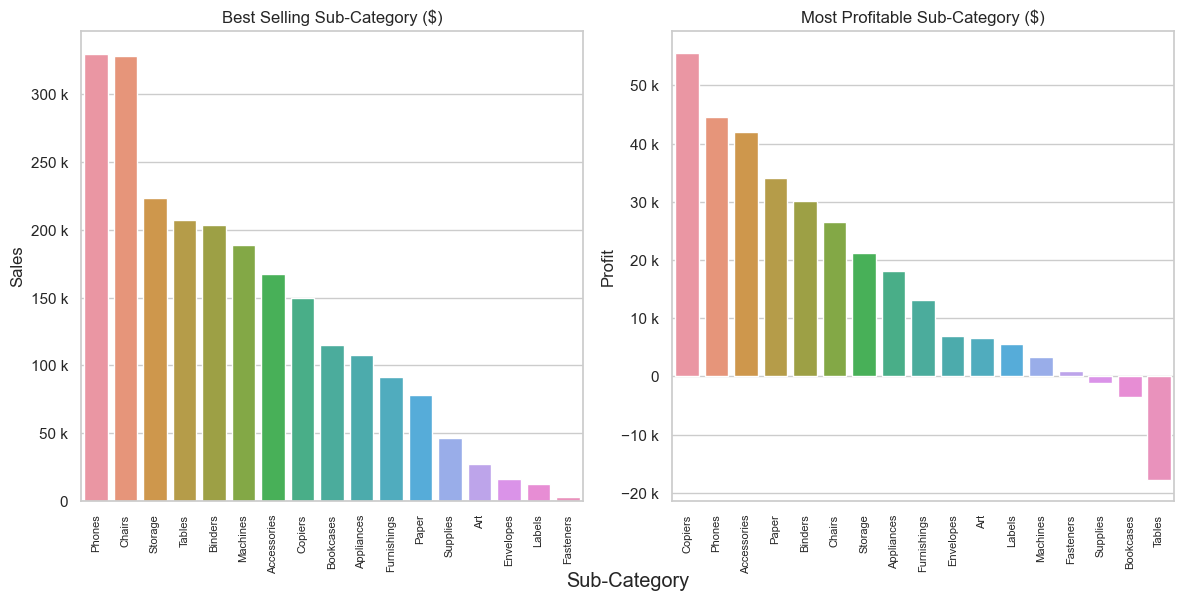

In [188]:
subcat_analysis = pd.DataFrame(superstore_data.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

# Create dataframes for sales and profits by subcategory, sorted in descending order.
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))

# Set grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category ($)")

# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category ($)")

# Set spacing between subplots
for barplot in [subcat1, subcat2]:
    barplot.set_xticklabels(barplot.get_xticklabels(),rotation = "vertical", size = 8)
    barplot.yaxis.set_major_formatter(ticker.EngFormatter())
    barplot.set(xlabel = None)

figure.tight_layout()
figure.supxlabel('Sub-Category', x= 0.53, y = 0.001)
plt.show()

We can see that 
- Phones and Chairs are Top 2 best selling sub-category.
- Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. 
- On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. 

---

### Sales By Year

From the first few records we can see that there are orders from more than one year. It would be useful to break down the sales and profit figures by year, so we can see if the business has been growing.

In [189]:
order_date_chronological = superstore_data['Order Date'].sort_values()

first_order, last_order = order_date_chronological.iloc[0], order_date_chronological.iloc[-1]

timespan_years = (last_order.year - first_order.year)
timespan_months = (last_order.month - first_order.month)

print(f"The data has sales from {first_order.date()} to {last_order.date()}. That's {timespan_years} years and {timespan_months} months.")

The data has sales from 2014-01-03 to 2017-12-30. That's 3 years and 11 months.


The total figures by year are:

In [190]:
# Creating a new column containing the year of sale for each order.
superstore_data['Year'] = superstore_data['Order Date'].dt.year

year_analysis = pd.DataFrame(superstore_data.groupby(['Year'])[['Sales', 'Profit', 'Quantity']].sum())
year_analysis

,Sales,Profit,Quantity
Year,,,
2014,484247.4981,49543.9741,7581
2015,470532.5090,61618.6037,7979
2016,609205.5980,81795.1743,9837
2017,733215.2552,93439.2696,12476


This is easier to visualise with a graph.

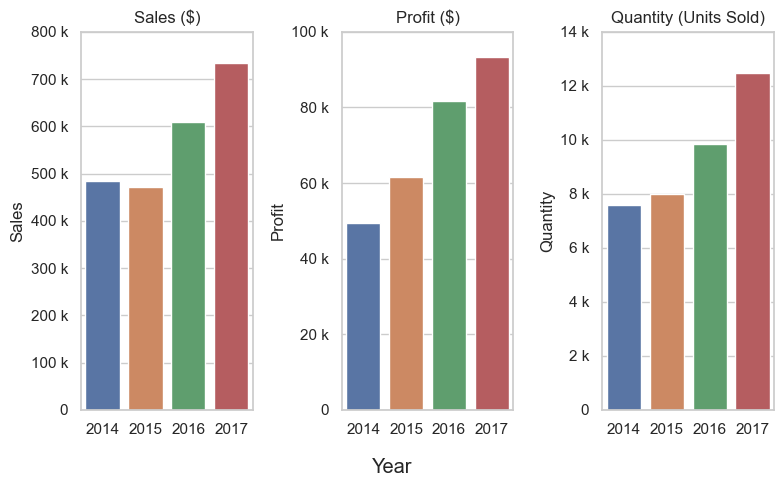

In [191]:
# Set for grouped plots 
figure, axs = plt.subplots(1, 3, figsize=(8, 5))

# Plot barplots
annual_sales_plot = sns.barplot(x = year_analysis.index, y = year_analysis.Sales, ax=axs[0])
annual_profit_plot = sns.barplot(x = year_analysis.index, y = year_analysis.Profit, ax=axs[1])
annual_quantity_plot = sns.barplot(x = year_analysis.index, y = year_analysis.Quantity, ax=axs[2])

# Set titles
annual_sales_plot.set(title = 'Sales ($)')
annual_profit_plot.set(title = 'Profit ($)')
annual_quantity_plot.set(title = 'Quantity (Units Sold)')

annual_sales_plot.set(ylim = (0,800000))
annual_profit_plot.set(ylim = (0,100000))
annual_quantity_plot.set(ylim = (0,14000))

for barplot in [annual_sales_plot, annual_profit_plot, annual_quantity_plot]:
    barplot.yaxis.set_major_formatter(ticker.EngFormatter())
    barplot.set(xlabel = None)


# Set spacing between subplots
figure.supxlabel('Year', y = 0.03)
figure.tight_layout()

We can see that even though sales stalled between 2014 and 2015, profit has increased year on year. This indicates that the business is growing healthily with time.

---

### Sales By Month 

Comparing monthly sales over the years can help determine if there are trends throughout the year that can be capitalised on.

In [192]:
#Creating a column that parses the month of sales from the Order Date column
superstore_data['Month'] = superstore_data['Order Date'].dt.month

[]

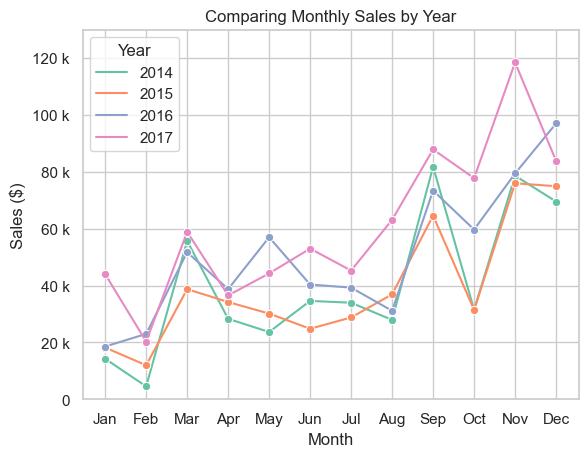

In [193]:
#Setting a colour palette for the lineplot 
colours = sns.color_palette('Set2',4)

monthly_comparison_plot = sns.lineplot(data=superstore_data, x='Month', y='Sales',
    hue='Year',  palette=colours, errorbar=None, marker = 'o', estimator=sum)

monthly_comparison_plot.set(ylim = (0,130000), ylabel = 'Sales ($)')
monthly_comparison_plot.yaxis.set_major_formatter(ticker.EngFormatter())

# Creating a list of month names to pass into the graph as labels for the x-axis ticks
month_names = ['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 
monthly_comparison_plot.set_xticks(range(1,13), labels = month_names)

plt.title('Comparing Monthly Sales by Year')
plt.plot()

We can see that there are increases in sales every March, September, November, and December. These are months with US public holidays, the business may be running promotions around these dates. If they are not, they should consider doing so.

### Segment Analysis

The dataset specifies the type of customer each order was made by. The labels are Consumer, Corporate, and Home Office.

Breaking down sales by segment can give a better idea of which areas of the business are performing best and help decide where the superstore could focus marketing efforts.

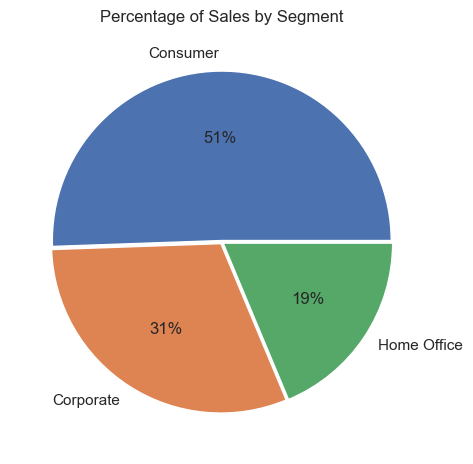

In [194]:
#Grouping the data by segment and finding the sum of sales for each segment
segment_sales_data = superstore_data.groupby(superstore_data['Segment'])['Sales'].sum()

#Using PyPlot to create a piechart for the data as pie charts are good for showing proportions.
plt.pie(segment_sales_data, labels = segment_sales_data.index, autopct='%.0f%%', explode = [0.01, 0.01 ,0.01])

plt.title('Percentage of Sales by Segment')
plt.tight_layout()

Consumer sales are the strongest segment by far. 

Let's have a look at how the segments have grown over time. This could indicate any weak areas for the business or areas that might benefit from increased investment.

[]

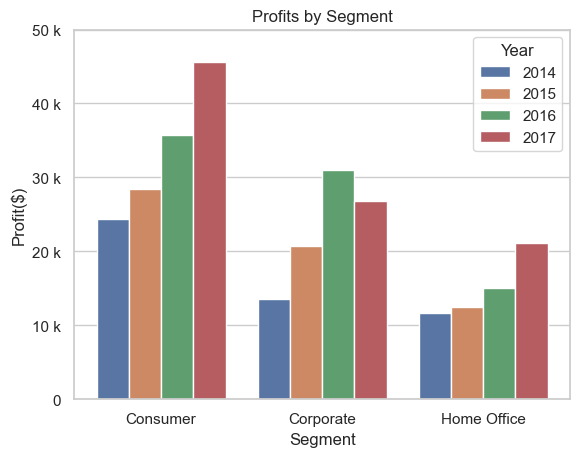

In [195]:
plot_yearly_sales_by_segment = sns.barplot(data=superstore_data, x='Segment', y='Profit', 
                                      hue='Year', errorbar=None, estimator=sum)

plot_yearly_sales_by_segment.set(ylim = (0,50000), ylabel = 'Profit($)')
plot_yearly_sales_by_segment.yaxis.set_major_formatter(ticker.EngFormatter())

plt.title('Profits by Segment')
plt.plot()

Consumer profits have been consistently the best, but corporate profits have also made seen significant growth over the years. It would be a good idea to cross-reference the sales information with the marketing spend to see whether it would be cost-efficient to try to keep driving corporate sales higher.

The best selling products by segment are:

In [196]:
def best_by_segment(N, Metric ):
    grouped_by_segment = superstore_data.groupby(['Segment', 'Product Name']).agg({Metric: sum})
    
    best_metric_by_segment = grouped_by_segment[Metric].groupby('Segment', group_keys=False).nlargest(N)
    
    formatted_best_metric_by_segment = best_metric_by_segment.apply(lambda x: "${:,.2f}".format(x))
    
    return (formatted_best_metric_by_segment)


In [197]:
best_by_segment(3, 'Sales')

Segment      Product Name                                             
Consumer     Canon imageCLASS 2200 Advanced Copier                        $32,899.91
             HP Designjet T520 Inkjet Large Format Printer - 24" Color    $18,374.90
             HON 5400 Series Task Chairs for Big and Tall                 $17,384.30
Corporate    Canon imageCLASS 2200 Advanced Copier                        $17,499.95
             3D Systems Cube Printer, 2nd Generation, Magenta             $14,299.89
             Martin Yale Chadless Opener Electric Letter Opener            $8,328.10
Home Office  Cisco TelePresence System EX90 Videoconferencing Unit        $22,638.48
             Canon imageCLASS 2200 Advanced Copier                        $11,199.97
             Hewlett Packard LaserJet 3310 Copier                          $9,239.85
Name: Sales, dtype: object

In [198]:
best_by_segment(3, 'Profit')

Segment      Product Name                                                         
Consumer     Canon imageCLASS 2200 Advanced Copier                                    $12,879.96
             Ibico EPK-21 Electric Binding System                                      $4,630.48
             HP Designjet T520 Inkjet Large Format Printer - 24" Color                 $4,094.98
Corporate    Canon imageCLASS 2200 Advanced Copier                                     $8,399.98
             3D Systems Cube Printer, 2nd Generation, Magenta                          $3,717.97
             Fellowes PB300 Plastic Comb Binding Machine                               $3,030.20
Home Office  Hewlett Packard LaserJet 3310 Copier                                      $3,935.93
             Canon imageCLASS 2200 Advanced Copier                                     $3,919.99
             Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier     $1,995.99
Name: Profit, dtype: object

---

### Region Analysis

Expanding a business can involve opening new locations, creating targeted marketing campaigns, and setting up new distribution facilities. These activities require large amounts of investment and can pose many risks.

Understanding how different regions are performing can help the business decide which regions to allocate it's capital in order to maximise the returns and minimise risk.

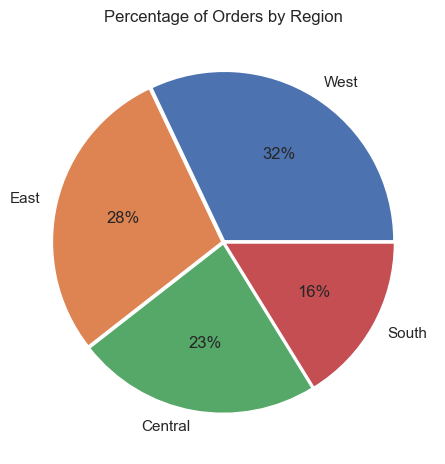

In [199]:
region_order_count = superstore_data['Region'].value_counts()
plt.pie(region_order_count, labels = region_order_count.index, autopct='%.0f%%', explode = [0.01, 0.01, 0.01, 0.01])

plt.title('Percentage of Orders by Region')
plt.tight_layout()

The stores in the East and West are the best performers overall, making almost 2/3 of all sales by the company.

Have they historically been the best sellers or has the data been skewed by any exceptionally good years?

[]

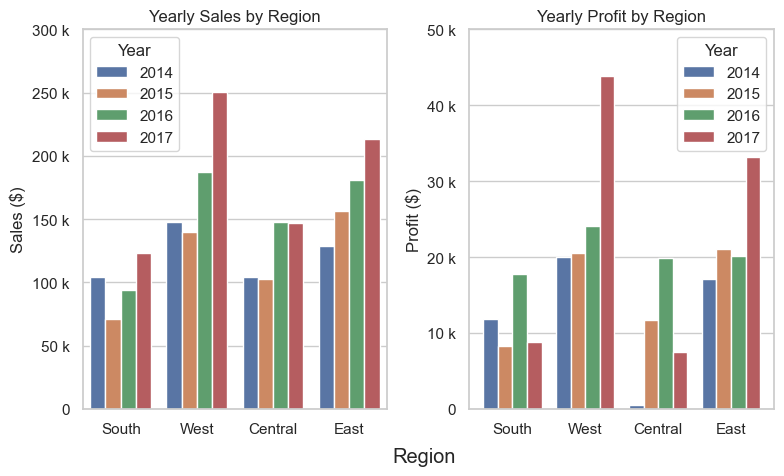

In [200]:
figure, axs = plt.subplots(1, 2, figsize=(8, 5))

plot_sales_by_region = sns.barplot(data=superstore_data, x='Region', y='Sales',
             hue='Year', errorbar=None, estimator=sum, ax = axs[0])
plot_profit_by_region = sns.barplot(data=superstore_data, x='Region', y='Profit',
             hue='Year', errorbar=None, estimator=sum, ax = axs[1])

plot_sales_by_region.set(title ='Yearly Sales by Region')
plot_profit_by_region.set(title ='Yearly Profit by Region')

plot_sales_by_region.set(ylim = (0,300000), ylabel = 'Sales ($)')
plot_profit_by_region.set(ylim = (0,50000), ylabel = 'Profit ($)')

for barplot in [plot_sales_by_region, plot_profit_by_region]:
    barplot.yaxis.set_major_formatter(ticker.EngFormatter())
    barplot.set(xlabel = None)

figure.supxlabel('Region', x = 0.54, y = 0.05)
figure.tight_layout()

plt.plot()

Stores in the West did have a very good year in 2017 but overall the two regions have always performed better than their counterparts. 
The East has seen seen year on year increases and looks promising for continued investment.

We can see that the South and Central regions started at roughly the same annual sales. Despite higher sales in years since, the Central region has had far worse profit margins.

Let's look at what may be causing the problems in the Central region.

[]

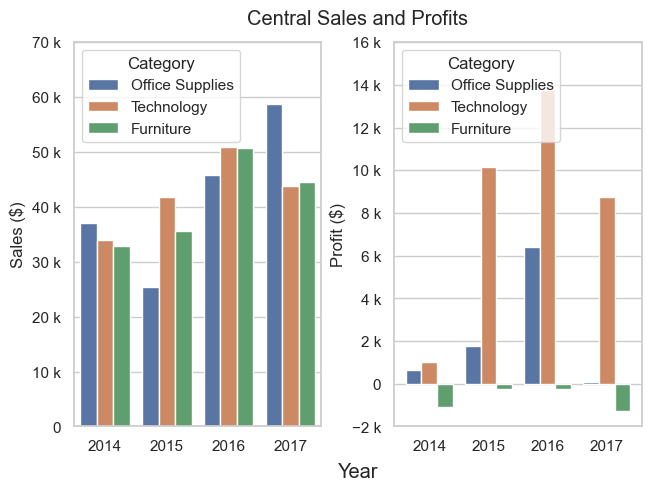

In [229]:
fig, axs =plt.subplots(1, 2, constrained_layout = True)

central_data = superstore_data[superstore_data['Region']=='Central']

central_sales = sns.barplot(data=central_data, x='Year', y='Sales',
             hue='Category', errorbar=None, estimator=sum, ax=axs[0])

central_profit = sns.barplot(data = central_data, x = 'Year', y = 'Profit', hue = 'Category', errorbar=None, estimator=sum, ax = axs[1])

central_sales.set(ylim = (0,70000), ylabel = 'Sales ($)')
central_profit.set(ylim =(-2000,16000), ylabel = 'Profit ($)')

for plot in (central_sales, central_profit):
    plot.yaxis.set_major_formatter(ticker.EngFormatter())
    plot.set(xlabel = None)

fig.suptitle('Central Sales and Profits', x = 0.55)
fig.supxlabel('Year', x = 0.55)
sns.move_legend(central_profit, 'upper left')

plt.plot()

It seems that what is plaguing the Central region is negative furniture profits and low office supply profits.

---

### Discount Analysis

Discounts are commonly used by businesses to entice new customers, reward customers who are making large orders, or to make amends for problems that a customer has experienced during their purchase. 

Let's have a look at how this business has used discounts.

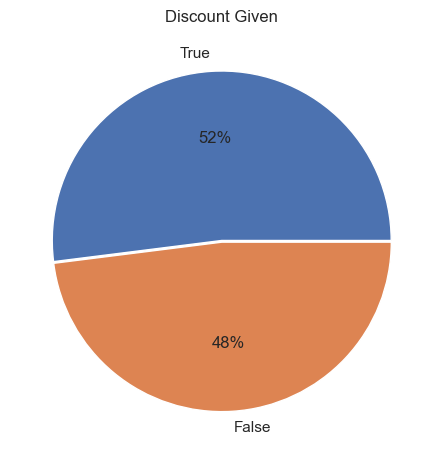

In [203]:
#Create a new columns that displays a bool value indicating whether a discount has been applied to the order.
superstore_data['Discount Applied'] = superstore_data['Discount']!=0

discount_order_count = superstore_data['Discount Applied'].value_counts()
plt.pie(discount_order_count, labels = discount_order_count.index, autopct='%.0f%%',explode= [0.01,0])

plt.title('Discount Given')
plt.tight_layout()

Over 50% of orders have had some sort of discount applied, that seems quite high. 

How much revenue has the business forfeited by giving discounts?

In [204]:
#Using condtional selection to only select orders that have a discount applied
discounted_sales = pd.DataFrame(superstore_data.loc[superstore_data['Discount Applied'] == True])

#Groups the orders by what percentage discount was given, then sums all sales in each group.
sales_by_discount_given = discounted_sales.groupby(['Discount']).Sales.sum()

discounted_revenue = 0

#Calculates the difference between the revenue with discount applied and how much revenue would have been made if no discount was applied.
for discount, value in sales_by_discount_given.items():
    discounted_revenue += (value/(1-discount))-value

print(f"Revenue lost through discounts given: ${discounted_revenue:,.2f}")

Revenue lost through discounts given: $566,734.18


That's equivalent to a year's worth of sales! This could be a problem if discounted sales aren't bringing in enough revenue.

Let's dig deeper into the discounts that have been given and who they've been given to.

[]

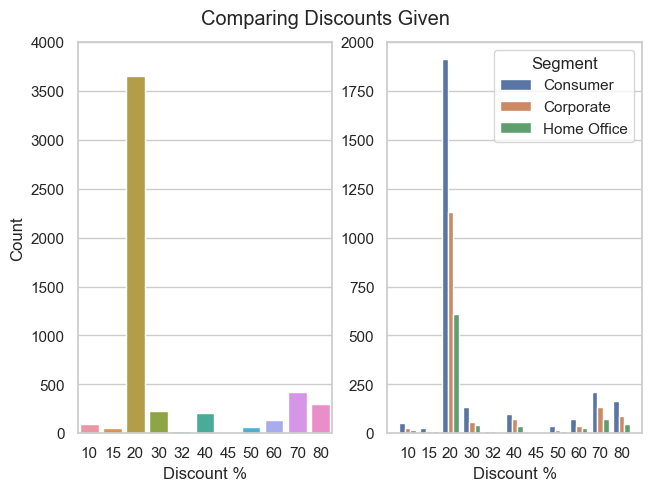

In [235]:
#Creates subplots so that 2 graphs can be displayed side by side. 
fig, axs =plt.subplots(1, 2, constrained_layout = True)

#Converts the Discount column from a decimal amount to a percentage.
discounted_sales['Discount %'] = (discounted_sales['Discount'].apply(lambda x: int(x*100)))

#Creates a list of segments so that I can set the hue order manually. This results in the hues appearing in size order(descending).
hue_order = ['Consumer', 'Corporate', 'Home Office']

#Plots the counts
plot_discount_order_count = sns.countplot(data = discounted_sales, x = discounted_sales['Discount %'],ax=axs[0])
plot_discount_by_segment = sns.countplot(data = discounted_sales, x = discounted_sales['Discount %'], hue = 'Segment', hue_order = hue_order, ax=axs[1])

#Formatting y labels
plot_discount_order_count.set(ylim = (0,4000),ylabel = 'Count')
plot_discount_by_segment.set(ylim = (0,2000), ylabel = None)

fig.suptitle('Comparing Discounts Given')

plt.plot()

We can see that 20% was by far the most commonly given discount and that consumers were the largest users of discounts. 

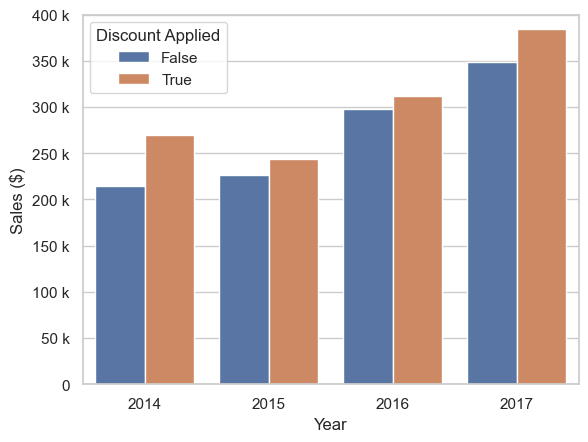

In [206]:
plot_total_discounts = sns.barplot(data = superstore_data, x = 'Year', y = 'Sales', hue = 'Discount Applied', errorbar = None, estimator = sum)

plot_total_discounts.set(ylim = (0,400000), ylabel = 'Sales ($)')
plot_total_discounts.yaxis.set_major_formatter(ticker.EngFormatter())

We can see that discounted sales actually made up the majority of revenue every year. Although the business is leaving a significant amount of money on the table by giving so many discounts, it is outweighed the fact that discounts have done an excellent job of drawing customers in.

# Conclusions.

- Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.
- Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.
- For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.
- For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.
- Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.